
# Stream de Dados do Twitter
   ## Análise de Sentimos dos  Tweets com LSTM
   * Classificação de sentimentos usando Keras com redes neurais recorrentes LSTM
   

In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import text_to_word_sequence
import re, os
from keras.models import Model

from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tqdm import tqdm
import time
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from datetime import datetime
import json
import warnings
warnings.simplefilter("ignore", UserWarning)
seed = 7
np.random.seed(seed)

In [ ]:
! pip install tweepy

In [12]:
#Crie sua chave. Essa será inválida. 
auth = OAuthHandler("4EOhX9m9GWkdi83JjD0pMIoRHhdbfhbfas", "fIStpgteyVI1ZZGVFUpYocyLH3CjhA2K9fCrLASfjOiCqGxoaShbfdhfbd")
auth.set_access_token("986074427896090630-jYtA49fV7odqZXiB8kT6euIfsfsff15eWTPoFs","VFoFxesgawt30p77qEgreSFxYMQ2OU4CdbYXSP5wR9l7ffdnf djf ")

# Coletandos  Tweets relacionados aos  candidatos à Presidência  após os resultados da eleição de 2018


In [8]:
print(time.strftime('%d %b %y'))
print(time.strftime('%H:%M:%S'))

07 Oct 18
23:14:55


In [13]:
created_at = []
id_str = []
text = []
arquivo = open(os.path.join('train.txt'),'w')
class MyListener(StreamListener):
    def on_data(self, dados):
        tweet = json.loads(dados)
        created_at.append(tweet["created_at"])
        id_str.append(tweet["id_str"])
        text.append(tweet["text"])
        obj = {"created_at":created_at,"id_str":id_str,"text":text,}
       # tweetind = col.insert_one(obj).inserted_id
        print (obj)
        return True


In [14]:
# Criando o objeto mylistener
mylistener = MyListener()

In [15]:

mystream = Stream(auth, listener = mylistener)

# Palavras chaves para busca

In [16]:
keywords = ['Bolsonaro', 'Haddad','Ciro']

In [17]:
mystream.filter(track=keywords)

{'created_at': ['Sun Oct 07 23:16:46 +0000 2018'], 'id_str': ['1049076093058207744'], 'text': ['RT @vvitorea: Os religiosos que votam no Bolsonaro https://t.co/tLqTlNwTdG']}
{'created_at': ['Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018'], 'id_str': ['1049076093058207744', '1049076094106783744'], 'text': ['RT @vvitorea: Os religiosos que votam no Bolsonaro https://t.co/tLqTlNwTdG', 'RT @bernardopkuster: Boletim de urna de Londrina: 227 válidos, 150 para Bolsonaro! 66%! https://t.co/149ZgUv1Sa']}
{'created_at': ['Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018'], 'id_str': ['1049076093058207744', '1049076094106783744', '1049076093951651840'], 'text': ['RT @vvitorea: Os religiosos que votam no Bolsonaro https://t.co/tLqTlNwTdG', 'RT @bernardopkuster: Boletim de urna de Londrina: 227 válidos, 150 para Bolsonaro! 66%! https://t.co/149ZgUv1Sa', 'RT @pisychoahs: se você votou no ciro gomes, não pense que teu voto foi jogad

{'created_at': ['Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018', 'Sun Oct 07 23:16:46 +0000 2018'

KeyError: 'created_at'

In [18]:
df_t = pd.DataFrame()
df_t['created_at'] = created_at
df_t['id_str'] = id_str
df_t['text'] =  text

# Resultado da coleta

In [20]:
df_t

,created_at,id_str,text
0,Sun Oct 07 23:16:46 +0000 2018,1049076093058207744,RT @vvitorea: Os religiosos que votam no Bolso...
1,Sun Oct 07 23:16:46 +0000 2018,1049076094106783744,RT @bernardopkuster: Boletim de urna de Londri...
2,Sun Oct 07 23:16:46 +0000 2018,1049076093951651840,"RT @pisychoahs: se você votou no ciro gomes, n..."
3,Sun Oct 07 23:16:46 +0000 2018,1049076094211674113,RT @CATERINAV: #7Oct El sorpresivo apoyo de Ro...
4,Sun Oct 07 23:16:46 +0000 2018,1049076093884555264,RT @larasouzat: “O Nordeste foi a única região...
5,Sun Oct 07 23:16:46 +0000 2018,1049076094106832896,O BRASIL INTEIRO COM EXCEÇÃO DO NORDESTE TÁ AS...
6,Sun Oct 07 23:16:46 +0000 2018,1049076094060523522,RT @dolfoda: O Ceará é o único estado que o Ci...
7,Sun Oct 07 23:16:46 +0000 2018,1049076094404583425,"RT @jmkarg: Politológicamente, no deja de resu..."
8,Sun Oct 07 23:16:46 +0000 2018,1049076094312349696,RT @csoldoni: quem votou no bolsonaro pode me ...
9,Sun Oct 07 23:16:46 +0000 2018,1049076094299721728,@paulacamara_ Mara Gabrilli... Isso dai é tipo...


In [21]:
# O model será exportado para este arquivo
filename='model_saved.h5'
epochs = 4
# dimensionalidade do word embedding pré-treinado
word_embedding_dim = 50
# número de amostras a serem utilizadas em cada atualização do gradiente
batch_size = 32
# Reflete a quantidade máxima de palavras que iremos manter no vocabulário
max_fatures = 5000
# dimensão de saída da camada Embedding
embed_dim = 128
# limitamos o tamanho máximo de todas as sentenças
max_sequence_length = 300
pre_trained_wv = True
bilstm = False

def clean_str(string):
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')


    return string.strip().lower()

In [ ]:
ls ../input/glove-s50/glove_s50/

In [22]:
def prepare_data(data):    
    data = data[['text_pt','sentiment']]

    data['text'] = data['text_pt'].apply(lambda x: x.lower())
    data['text'] = data['text_pt'].apply(lambda x: clean_str(x))
    
    stop_words = set(stopwords.words('portuguese'))
    text = []
    for row in data['text'].values:
        word_list = text_to_word_sequence(row)
        no_stop_words = [w for w in word_list if not w in stop_words]
        no_stop_words = " ".join(no_stop_words)
        text.append(no_stop_words)


    tokenizer = Tokenizer(num_words=max_fatures, split=' ')

    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)  
    
    X = pad_sequences(X, maxlen=max_sequence_length)
    #X = pad_sequences(X)

    word_index = tokenizer.word_index
    Y = pd.get_dummies(data['sentiment']).values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

    return X_train, X_test, Y_train, Y_test, word_index, tokenizer


def load_pre_trained_wv(word_index, num_words, word_embedding_dim):
    embeddings_index = {}
    f = open(os.path.join('../input/glove-s50/glove_s50/', 'glove_s{}.txt'.format(word_embedding_dim)), encoding='utf-8')
    for line in tqdm(f):
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    print('%s word vectors.' % len(embeddings_index))

    embedding_matrix = np.zeros((num_words, word_embedding_dim))
    for word, i in word_index.items():
        if i >= max_fatures:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [23]:
data = pd.read_csv("../input/imdbpt/imdb1/imdb/imdb-reviews-pt-br.csv")
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [26]:
# Separamos os dados em conjuntos de aprendizagem e validação/teste. O processamento
# desta célula vai demorar um pouco.
X_train, X_test, Y_train, Y_test, word_index, tokenizer = prepare_data(data)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(39567, 300) (39567, 2)
(9892, 300) (9892, 2)


In [27]:
def model():  
    if pre_trained_wv is True:
        num_words = min(max_fatures, len(word_index) + 1)
        weights_embedding_matrix = load_pre_trained_wv(word_index, num_words, word_embedding_dim)
        input_shape = (max_sequence_length,)
        model_input = Input(shape=input_shape, name="input", dtype='int32')    
        embedding = Embedding(
            num_words, 
            word_embedding_dim,
            input_length=max_sequence_length, 
            name="embedding", 
            weights=[weights_embedding_matrix], 
            trainable=False)(model_input)
        if bilstm is True:
            lstm = Bidirectional(LSTM(word_embedding_dim, dropout=0.2, recurrent_dropout=0.2, name="lstm"))(embedding)
        else:
            lstm = LSTM(word_embedding_dim, dropout=0.2, recurrent_dropout=0.2, name="lstm")(embedding)

    else:
        input_shape = (max_sequence_length,)
        model_input = Input(shape=input_shape, name="input", dtype='int32')    

        embedding = Embedding(max_fatures, embed_dim, input_length=max_sequence_length, name="embedding")(model_input)
        
        if bilstm is True:
            lstm = Bidirectional(LSTM(embed_dim, dropout=0.2, recurrent_dropout=0.2, name="lstm"))(embedding)
        else:
            lstm = LSTM(embed_dim, dropout=0.2, recurrent_dropout=0.2, name="lstm")(embedding)
    
    model_output = Dense(2, activation='softmax', name="softmax")(lstm)
    model = Model(inputs=model_input, outputs=model_output)
    return model

929606it [00:18, 49838.69it/s]


929606 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           250000    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
softmax (Dense)              (None, 2)                 102       
Total params: 270,302
Trainable params: 20,302
Non-trainable params: 250,000
_________________________________________________________________
None
Train on 39567 samples, validate on 9892 samples
Epoch 1/4
39567/39567 [==============================] - 929s 23ms/step - loss: 0.5813 - acc: 0.6888 - val_loss: 0.4417 - val_acc: 0.7883
Epoch 2/4
39567/39567 [===========================

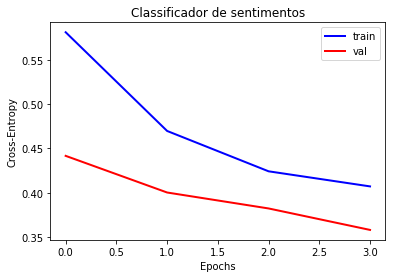

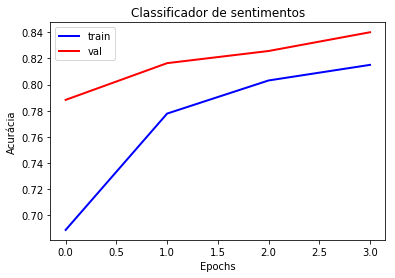

Acc: 84.01%


In [28]:
model = model()
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

if not os.path.exists('./{}'.format(filename) ):

    hist = model.fit(
        X_train, 
        Y_train, 
        validation_data=(X_test, Y_test),
        epochs=epochs,
        batch_size=batch_size, 
        shuffle=True,
        verbose=1)

    model.save_weights(filename)    

    # Plot
    plt.figure()
    plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title('Classificador de sentimentos')
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(loc='upper right')
    plt.show()

    plt.figure()
    plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
    plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
    plt.title('Classificador de sentimentos')
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.legend(loc='upper left')
    plt.show()

else:
    model.load_weights('./{}'.format(filename) )

scores = model.evaluate(X_test, Y_test, verbose = 0, batch_size = batch_size)
print("Acc: %.2f%%" % (scores[1]*100))

# Previsões

In [29]:
for twitte in df_t['text']:
    print(twitte)
    sentence = clean_str(twitte)

    new_text = [sentence]
    new_text = tokenizer.texts_to_sequences(new_text)

    new_text = pad_sequences(new_text, maxlen=max_sequence_length, dtype='int32', value=0)

    sentiment = model.predict(new_text,batch_size=1,verbose = 2)[0]

    if(np.argmax(sentiment) == 0):
        pred_proba = "%.2f%%" % (sentiment[0]*100)
        print("negativo => ", pred_proba)
    elif (np.argmax(sentiment) == 1):
        pred_proba = "%.2f%%" % (sentiment[1]*100)
        print("positivo => ", pred_proba)

RT @vvitorea: Os religiosos que votam no Bolsonaro https://t.co/tLqTlNwTdG
negativo =>  61.67%
RT @bernardopkuster: Boletim de urna de Londrina: 227 válidos, 150 para Bolsonaro! 66%! https://t.co/149ZgUv1Sa
negativo =>  61.67%
RT @pisychoahs: se você votou no ciro gomes, não pense que teu voto foi jogado "fora" só pq ele não foi pro segundo turno, sinta orgulho, p…
negativo =>  62.62%
RT @CATERINAV: #7Oct El sorpresivo apoyo de Ronaldinho a Bolsonaro, el candidato presidencial de la ultraderecha brasileña. https://t.co/3j…
negativo =>  51.80%
RT @larasouzat: “O Nordeste foi a única região na qual o Bolsonaro não liderou” https://t.co/RXfWsB4vel
negativo =>  58.97%
O BRASIL INTEIRO COM EXCEÇÃO DO NORDESTE TÁ ASSIM PORRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
positivo =>  50.94%
RT @dolfoda: O Ceará é o único estado que o Ciro está com folga em primeiro. Justamente o estado que ele construiu sua carreira política. I…
negativo =>  51.59%
RT @jmkarg: Politológicamente, no deja de resultar asombroso